In [1]:
import matplotlib

In [2]:
from matplotlib import font_manager, rc
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothicLight.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()

font_list = matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

font_list

In [3]:
font_name

'NanumBarunGothic'

In [4]:
rc('font', family=font_name)

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
# Excel 데이터를 데이터프레임 변환 
df = pd.read_excel('./data/시도별 전출입 인구수.xlsx', engine= 'openpyxl', header=0)


# 전출지별에서 누락값(NaN)을 앞 데이터로 채움 (엑셀 양식 병합 부분)
df = df.fillna(method='ffill')

# 서울에서 다른 지역으로 이동한 데이터만 추출하여 정리
mask = (df['전출지별'] == '서울특별시') & (df['전입지별'] != '서울특별시') 
df_seoul = df[mask]
df_seoul = df_seoul.drop(['전출지별'], axis=1)
df_seoul.rename({'전입지별':'전입지'}, axis=1, inplace=True)
df_seoul.set_index('전입지', inplace=True)

# 서울에서 경기도로 이동한 인구 데이터 값만 선택 
sr_one = df_seoul.loc['경기도']

/tmp/ipykernel_2386/3707250521.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df = df.fillna(method='ffill')


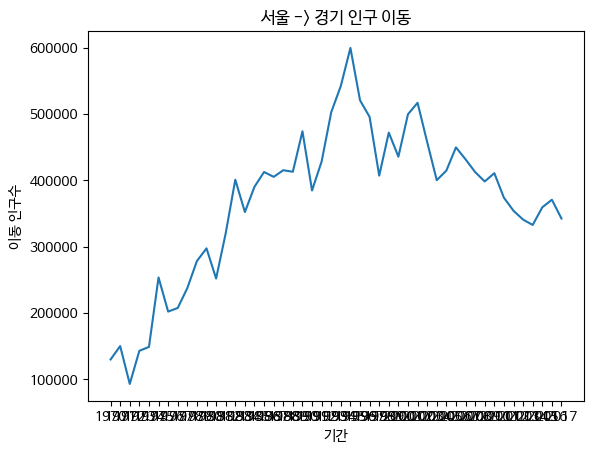

In [7]:
# x, y축 데이터를 plot 함수에 입력
plt.plot(sr_one.index, sr_one.values)

# 차트 제목 추가
plt.title('서울 -> 경기 인구 이동')

# 축이름 추가
plt.xlabel('기간')
plt.ylabel('이동 인구수')

plt.show()  # 변경사항 저장하고 그래프 출력